In [1]:
import numpy as np
import pt_utils
import partita

import harmony_state
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd

from sys import getsizeof

import matplotlib.pyplot as plt

# functions 

for investigating a 'dot-product' relationship between binary numbers and powers of three.

In [2]:
oct_range = 1
oct_width = 12

num_notes = oct_range*oct_width

powers_of_two = np.array([2**i for i in range(num_notes)]) # for and reversed order
powers_of_three = np.array([3**i for i in range(num_notes)])
powers_of_five = np.array([5**i for i in range(num_notes)])

# def binary_numpy_array(notegroup):
#     bits = getsizeof(notegroup)
#     np_array = np.zeros(bits, dtype=int)

#     for i in range(bits):
#         if (notegroup & 1) > 0:
#             np_array[i] = 1
#         notegroup >>= 1

#     return np_array

def binary_to_power(bin_num, power=2):
    # BEWARE: MAXIMUM BIN_NUM SIZE HERE IS 12
    np_conv = pt_utils.binary_notegroup_to_numpy_array(bin_num)
    # reverse so that the array goes from low to high like the powers (and like the piano keyboard).
    np_conv = np_conv[::-1]
    return np.dot(np_conv, np.array([power**i for i in range(num_notes)]))

def is_prime(n):
    if (n <= 1) :
        return False
    if (n <= 3) :
        return True
    if (n % 2 == 0 or n % 3 == 0) :
        return False
    i = 5
    while(i * i <= n) :
        if (n % i == 0 or n % (i + 2) == 0):
            return False
        i = i + 6
    return True

def octave_reduce(power):
    while power >= 2:
        power /=2
    return power

def flip_scale_order(nums):
    return [nums[i//12 * 12 + (7*i) % 12] for i in range(num_notes)]

def count_in_base(bin_num, base):
    '''
    take a number in binary, return it as an array in base 'base'
    
    input: 0x1001, 2
    
    output: np.array([1,0,0,1])
    '''

In [3]:
powers_of_three_reduced = [octave_reduce(pow_three) for pow_three in powers_of_three]

In [4]:
powers_of_twelfthroot_two = [octave_reduce(2**((i)/12)) for i in range(num_notes)]

In [5]:
 # see the piano shape in the decimals

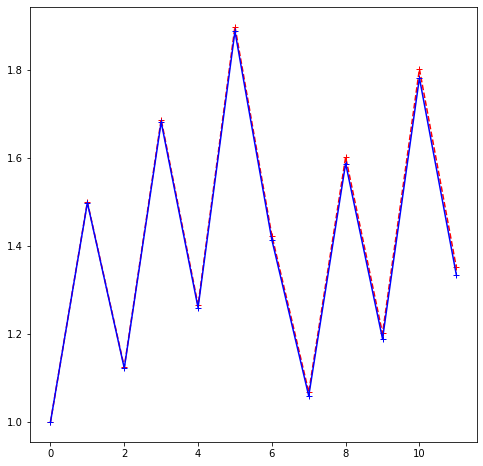

In [6]:
fig = plt.figure(figsize=(8,8))
plt.plot(powers_of_three_reduced, 'r--+')
plt.plot(flip_scale_order(powers_of_twelfthroot_two), 'b-+')

# notes: 

all have the same number of decimals as the power of two required to reduce. Except the last, which must be .375 but... out of space.

In [7]:
np.sum(powers_of_three_reduced)

16.92498016357422

In [8]:
np.sum(powers_of_twelfthroot_two)

16.81715374510577

### test chords:

In [9]:
cM_bin = 0b111111100000
cM = pt_utils.binary_notegroup_to_numpy_array(cM_bin)

cpent_bin = 0b111110000000
cpent = pt_utils.binary_notegroup_to_numpy_array(cpent_bin)

chrom_bin = 0b111111111111
chrom = pt_utils.binary_notegroup_to_numpy_array(chrom_bin)

# dot products

### scales

In [10]:
np.dot(cM, powers_of_twelfthroot_two)

8.380106724109393

In [11]:
np.dot(cM, powers_of_three_reduced)

9.900390625

In [12]:
np.dot(chrom, powers_of_twelfthroot_two)

16.81715374510577

In [13]:
np.dot(chrom, powers_of_three_reduced)

16.92498016357422

In [14]:
np.dot(cpent, powers_of_twelfthroot_two)

5.631053307566263

In [15]:
np.dot(cpent, powers_of_three_reduced)

6.578125

### straight up powers

In [16]:
np.dot(cM, powers_of_two)

127

In [17]:
np.dot(cM, powers_of_three) # star number

1093

In [18]:
np.dot(chrom, powers_of_two)

4095

In [19]:
np.dot(chrom, powers_of_three)

265720

### To find how many numbers between 0b1 and 0b111111111111 are analyzable as seven notes.

In [20]:
all_analyses = [partita.analyze_binary_note_input(i) for i in range(chrom_bin)]
len(all_analyses)

4095

Well, that's a lot of things not being analyzed.  Bitonality is necessary.

Then on the other hand, how often does anyone play more than seven notes at once?

In [21]:
pos_match = [analysis for analysis in all_analyses if not np.array_equal(analysis[0], np.array([12,7,7,7,7]))]

In [22]:
len(pos_match)

1387

In [23]:
ints = np.array([i for i in range(0b111111)])

three_dots = np.array([binary_to_power(i, power=3) for i in ints])
three_primes = [(i, pr) for i, pr in enumerate(three_dots) if is_prime(pr)]

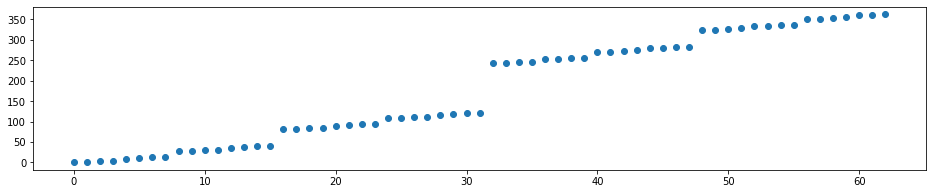

In [24]:
fig = plt.figure(figsize=(16,3))
plt.scatter(ints, three_dots)

In [25]:
three_diffs = [three_dots[i+1] - three_dots[i] for i in range(len(three_dots)-1)]

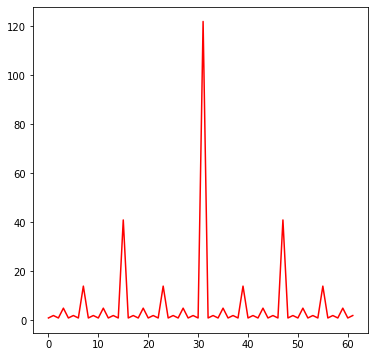

In [26]:
fig = plt.figure(figsize=(6,6))
plt.plot(three_diffs, 'r-')

three times the previous peak minus one, then mirror...

In [27]:
five_dots = np.array([binary_to_power(i, power=5) for i in ints])
five_primes = [(i, pr) for i, pr in enumerate(five_dots) if is_prime(pr)]

In [28]:
five_diffs = [five_dots[i+1] - five_dots[i] for i in range(len(five_dots)-1)]

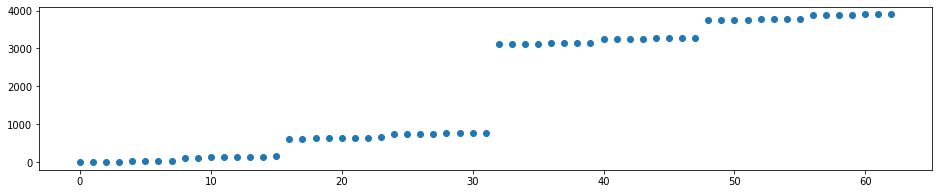

In [29]:
fig = plt.figure(figsize=(16,3))
plt.scatter(ints, five_dots)

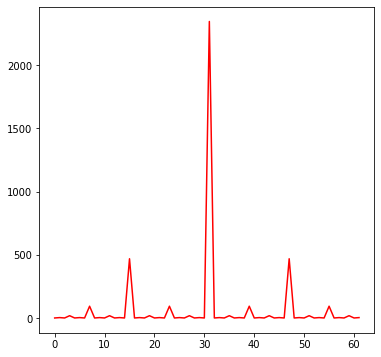

In [30]:
fig = plt.figure(figsize=(6,6))
plt.plot(five_diffs, 'r-')

In [31]:
onepointfive_dots = np.array([binary_to_power(i, power=1.5) for i in ints])
onepointfiveprimes = [(i, pr) for i, pr in enumerate(onepointfive_dots) if is_prime(pr)]

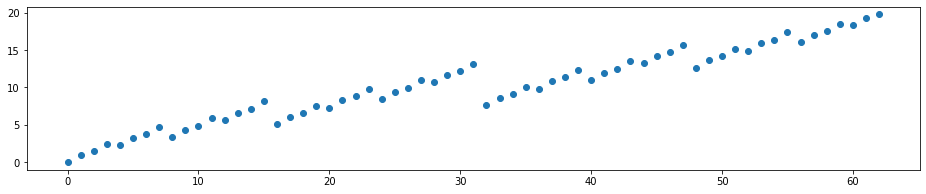

In [32]:
fig = plt.figure(figsize=(16,3))
plt.scatter(ints, onepointfive_dots)

In [33]:
onepointfive_diffs = [onepointfive_dots[i+1] - onepointfive_dots[i] for i in range(len(onepointfive_dots)-1)]

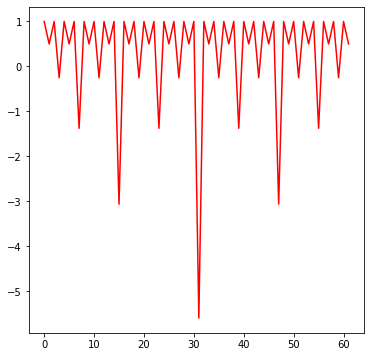

In [34]:
fig = plt.figure(figsize=(6,6))
plt.plot(onepointfive_diffs, 'r-')

In [35]:
seven_dots = np.array([binary_to_power(i, power=7) for i in ints])
seven_primes = [(i, pr) for i, pr in enumerate(seven_dots) if is_prime(pr)]

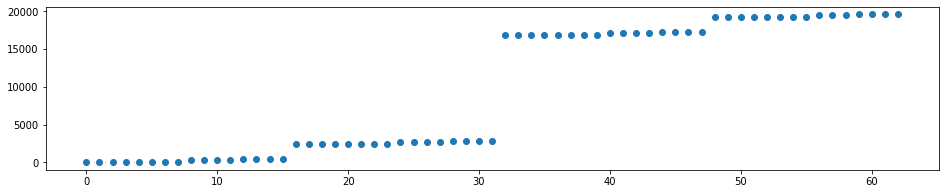

In [36]:
fig = plt.figure(figsize=(16,3))
plt.scatter(ints, seven_dots)

In [37]:
seven_diffs = [seven_dots[i+1] - seven_dots[i] for i in range(len(seven_dots)-1)]

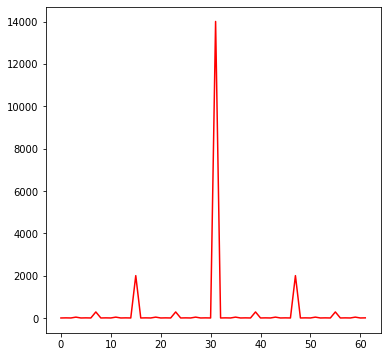

In [38]:
fig = plt.figure(figsize=(6,6))
plt.plot(seven_diffs, 'r-')

In [39]:
eleven_dots = np.array([binary_to_power(i, power=11) for i in ints])
eleven_primes = [(i, pr) for i, pr in enumerate(eleven_dots) if is_prime(pr)]

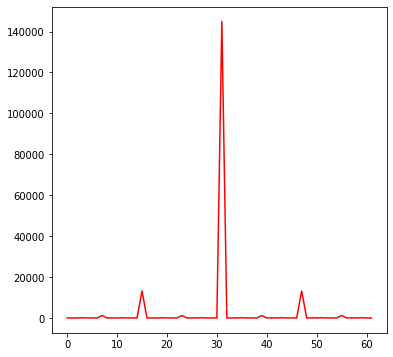

In [40]:
eleven_diffs = [eleven_dots[i+1] - eleven_dots[i] for i in range(len(eleven_dots)-1)]
fig = plt.figure(figsize=(6,6))
plt.plot(eleven_diffs, 'r-')

In [41]:
ints = np.array([i for i in range(0b11111)])

poly_bases = np.array([i+2 for i in range(10) if is_prime(i+2)])

# quick try at just integers for number systems.
#poly_bases = [i + 2 for i in range(10)]

poly_dot_ps = np.array([np.array([binary_to_power(i, power=p) for i in ints]) for p in poly_bases])

prime_primes = np.array([np.array([(i, pr) for i, pr in enumerate(poly_dot_ps[k]) if is_prime(pr)]) for k in range(len(poly_bases))])


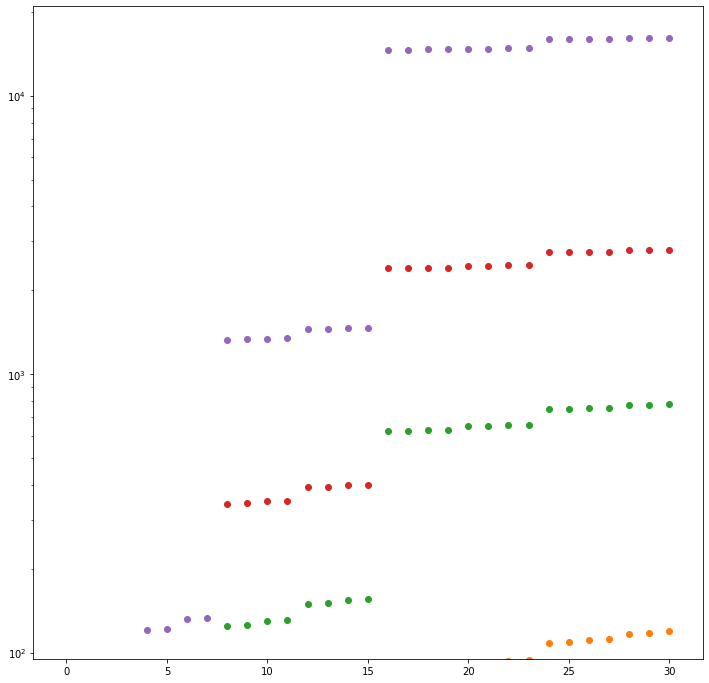

In [42]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

for dots in poly_dot_ps:
    ax.scatter(ints, dots)

plt.show()

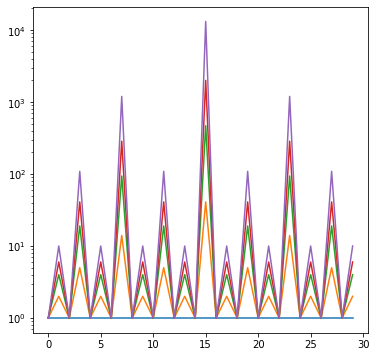

In [43]:
prime_diffs = [[poly_dot_ps[k][i+1] - poly_dot_ps[k][i] for i in range(len(poly_dot_ps[k])-1)] for k in range(len(poly_bases))]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
for diffs in prime_diffs:
    ax.plot(diffs)

plt.show()

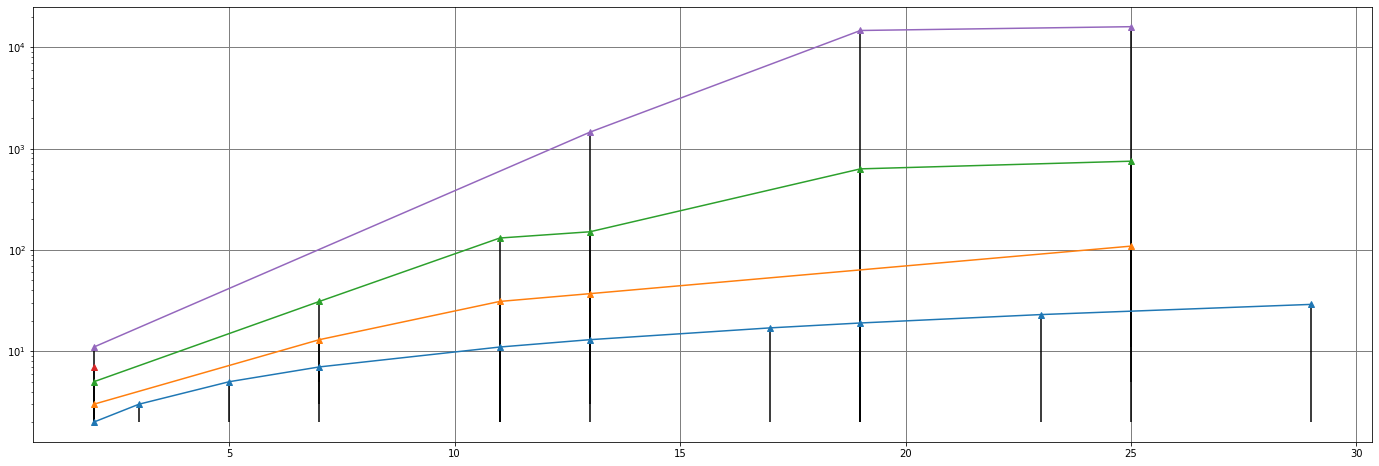

In [44]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
ax.grid(color='gray', linestyle='-', linewidth=1)
for tuples in prime_primes:
    plt.plot(*zip(*tuples), '-^')
    plt.vlines(*zip(*tuples), tuples[0])
    
# the binary representation of the first is the second when considered in its base (makes sense... that's the process..)

In [45]:
# print("polynomial base: (index, prime_num)")
# for i, prime_list in enumerate(prime_primes):
#     print(str(i+2) + " " + str(prime_list))

In [46]:
ints = np.array([i for i in range(0b1111111)])

poly_bases = np.array([i+2 for i in range(50) if is_prime(i+2)])

# quick try at just integers for number systems.
#poly_bases = [i + 2 for i in range(40)]

poly_dot_ps = np.array([np.array([binary_to_power(i, power=p) for i in poly_bases]) for p in poly_bases])



In [47]:
prime_primes = np.array([np.array([(k, pr) for i, pr in enumerate(poly_dot_ps[k]) if is_prime(pr)]) for k in range(len(poly_bases))])

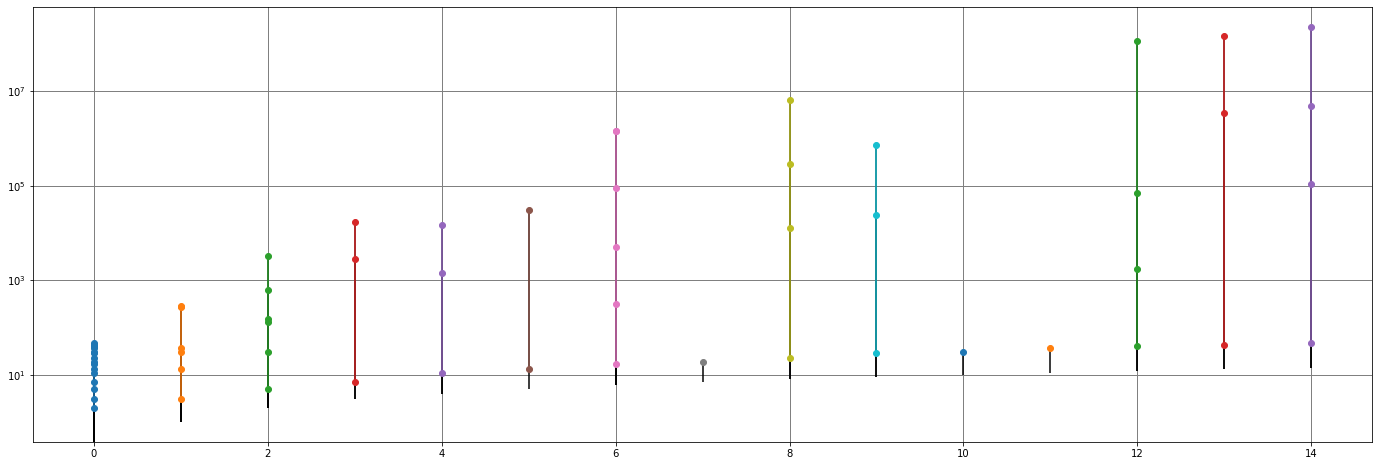

In [48]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xscale('log')
ax.set_yscale('log')

ax.grid(color='gray', linestyle='-', linewidth=1)
for tuples in prime_primes:
    plt.plot(*zip(*tuples), '-o')
    plt.vlines(*zip(*tuples), tuples[0])

In [49]:
print("polynomial base: (index, prime_num)")
for i, prime_list in enumerate(prime_primes):
    print(str(i+2) + " " + str(prime_list))
    print("pct: " + str(len(prime_list)/len(ints)))

polynomial base: (index, prime_num)
2 [[ 0  2]
 [ 0  3]
 [ 0  5]
 [ 0  7]
 [ 0 11]
 [ 0 13]
 [ 0 17]
 [ 0 19]
 [ 0 23]
 [ 0 29]
 [ 0 31]
 [ 0 37]
 [ 0 41]
 [ 0 43]
 [ 0 47]]
pct: 0.11811023622047244
3 [[  1   3]
 [  1  13]
 [  1  31]
 [  1  37]
 [  1 271]
 [  1 283]]
pct: 0.047244094488188976
4 [[   2    5]
 [   2   31]
 [   2  131]
 [   2  151]
 [   2  631]
 [   2 3251]]
pct: 0.047244094488188976
5 [[    3     7]
 [    3  2801]
 [    3 17207]]
pct: 0.023622047244094488
6 [[    4    11]
 [    4  1453]
 [    4 14653]]
pct: 0.023622047244094488
7 [[    5    13]
 [    5 30941]]
pct: 0.015748031496062992
8 [[      6      17]
 [      6     307]
 [      6    4931]
 [      6   88741]
 [      6 1424771]
 [      6 1425077]]
pct: 0.047244094488188976
9 [[ 7 19]]
pct: 0.007874015748031496
10 [[      8      23]
 [      8   12697]
 [      8  292561]
 [      8 6448511]]
pct: 0.031496062992125984
11 [[     9     29]
 [     9  24419]
 [     9 732541]]
pct: 0.023622047244094488
12 [[10 31]]
pct: 0.0078